In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload

import RNDPricer as rnd 
reload(rnd)

<module 'RNDPricer' from '/Users/adammoszczynski/Desktop/research/Kalshi-Arb/RNDPricer.py'>

In [2]:
df = pd.read_csv('spx_w/eoy_chains.csv')
df.head()

,Ask,Bid,Implied Volatility,quote,exp,T,option_type,strike,underlying,DF,div,fwd
0,0.50,0.30,18.0274,2022-09-01,2022-12-30,120.0,c,5250.0,3966.85,0.988731,21.626415,3990.187770
1,0.40,0.10,17.3205,2022-09-02,2022-12-30,119.0,c,5250.0,3924.26,0.988914,13.564881,3954.536655
2,0.35,0.15,18.0147,2022-09-06,2022-12-30,115.0,c,5250.0,3908.19,0.988953,21.370427,3930.235942
3,0.45,0.25,17.7123,2022-09-07,2022-12-30,114.0,c,5250.0,3979.87,0.989504,20.989881,4000.873019
4,0.50,0.25,17.3666,2022-09-08,2022-12-30,113.0,c,5250.0,4006.18,0.989127,17.608227,4032.414637


In [48]:
quote_day = '2023-05-15'
#quote_day = '2024-04-05'
chain = df[df['quote'] == quote_day]

reload(rnd)
pricer = rnd.RNDPricer(chain)

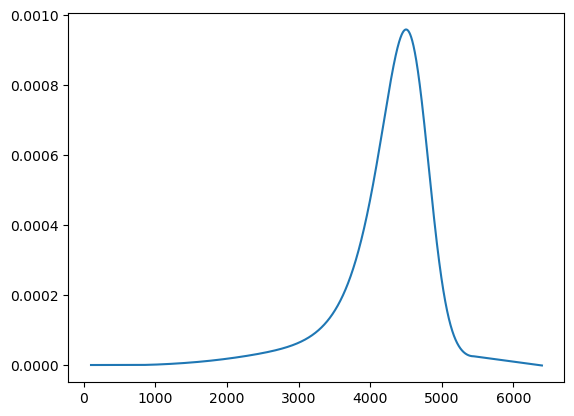

In [49]:
# plot rnd
rnd_df = pricer.get_rnd()
plt.plot(rnd_df['strike'], rnd_df['density'])
#plt.hlines(0, 1000, 7000, color='r')
#plt.xlim((4240, 4260))
plt.show()


Sum of all contracts: 0.9931971703992704
Deviation from 1: 0.006802829600729643


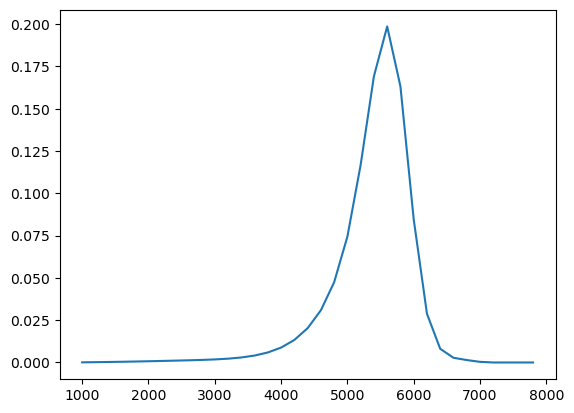

In [65]:
# plot price over even bucket sizes of 200
lower_grid = np.arange(1000, 8000, 200)
upper_grid = lower_grid + 200
price_grid = [pricer.price_bucket(l, u) for l, u in zip(lower_grid, upper_grid)]

print(f'Sum of all contracts: {sum(price_grid)}')
print(f'Deviation from 1: {1 - sum(price_grid)}')
plt.plot(lower_grid, price_grid)
plt.show()